In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# create location data
# data_size = (num_samples, num_features)

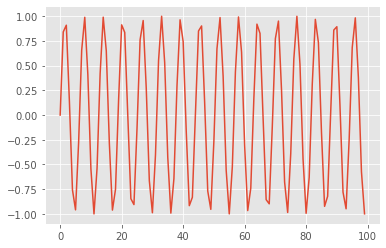

In [2]:
plt.style.use('ggplot')
x = range(0,100)
plt.plot(x, np.sin(x))
plt.show()

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# generate the training data
np.random.seed(42)
single_data_point = np.random.randint(0,100,2)
print('single_data_point =', single_data_point)
single_label = np.random.randint(0,2)
print('single_label =', single_label)

single_data_point = [51 92]
single_label = 0


In [4]:
def generate_data(num_samples, num_features=2):
    '''Randomly generate a number of data points'''
    data_size = (num_samples, num_features)
    data = np.random.randint(0,100,size=data_size)
    labels_size = (num_samples, 1)
    label = np.random.randint(0,2,size=labels_size)
    return data.astype(np.float32), label

In [5]:
train_data, labels = generate_data(11)
train_data, labels

(array([[71., 60.],
        [20., 82.],
        [86., 74.],
        [74., 87.],
        [99., 23.],
        [ 2., 21.],
        [52.,  1.],
        [87., 29.],
        [37.,  1.],
        [63., 59.],
        [20., 32.]], dtype=float32),
 array([[1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1]]))

In [6]:
train_data[0][1],labels[0][0]

(60.0, 1)

In [7]:
train_data[0,0], train_data[0,1]

(71.0, 60.0)

Text(0, 0.5, 'y coordinate')

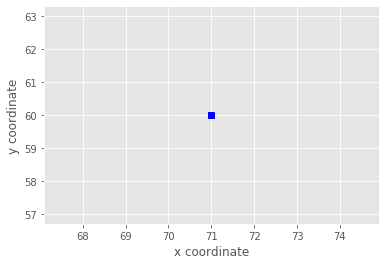

In [8]:
plt.plot(train_data[0,0], train_data[0,1], 'sb')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')

In [9]:
# func plot data
def plot_data(all_blue, all_red):
    plt.scatter(all_blue[:,0], all_blue[:,1],c='b',marker='s',s=180)
    plt.scatter(all_red[:,0],all_red[:,1],c='r',marker='^',s=180)
    plt.xlabel('x coordinate (feature 1)')
    plt.ylabel('y coordinate (feature 2)')

In [10]:
# ticky
train_data[labels.ravel() == 0]

array([[74., 87.],
       [ 2., 21.],
       [52.,  1.],
       [87., 29.],
       [37.,  1.],
       [63., 59.]], dtype=float32)

blue.shape = (6, 2)
red.shape = (5, 2)


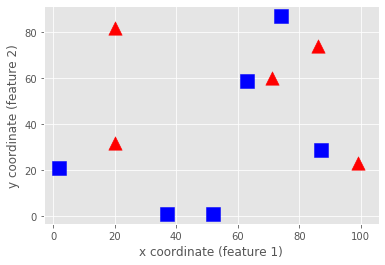

In [11]:
blue = train_data[labels.ravel() == 0]
red = train_data[labels.ravel() == 1]
print('blue.shape =', blue.shape)
print('red.shape =', red.shape)
plot_data(blue, red)

In [12]:
# ############
a = np.array([[1,2],[3,4],[5,6],[7,8],[9,10]])
b = np.array([0,1,0,1,0])
# a[labels[0:5].ravel() == 0]
# labels.ravel() == 0
# b = np.array([[1, 2], [3, 4]])
# b
a[b.ravel() == 0]
b.ravel() == 0 # array type
a[np.array([True, False,  True, False,  True])]

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10]])

In [13]:
# create k-NN classifier
knn = cv2.ml.KNearest_create()
# train
knn.train(train_data, cv2.ml.ROW_SAMPLE, labels)

True

In [14]:
# _ to ignore one output value
newcome, _ = generate_data(1)
newcome

array([[91., 59.]], dtype=float32)

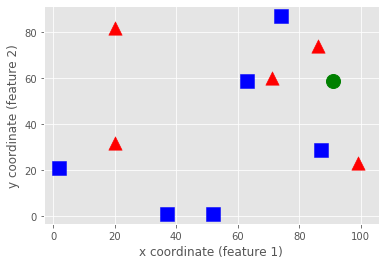

In [15]:
# use semicolon(;) to suppress the output
plot_data(blue, red)
plt.plot(newcome[0,0], newcome[0,1], 'go', markersize=14);

In [23]:
ret, results, neighbor, dist = knn.findNearest(newcome, 1)
print('Predicted label:\t', results)
print('Neighbor\'s label:\t', neighbor)
print('Distance to neighbor:\t', dist)

Predicted label:	 [[1.]]
Neighbor's label:	 [[1.]]
Distance to neighbor:	 [[250.]]


In [24]:
ret, results, neighbor, dist = knn.findNearest(newcome, 3)
print('Predicted label:\t', results)
print('Neighbor\'s label:\t', neighbor)
print('Distance to neighbor:\t', dist)

Predicted label:	 [[1.]]
Neighbor's label:	 [[1. 1. 0.]]
Distance to neighbor:	 [[250. 401. 784.]]


In [25]:
# k=7
# majority decided
ret, results, neighbor, dist = knn.findNearest(newcome, 7)
print('Predicted label:\t', results)
print('Neighbor\'s label:\t', neighbor)
print('Distance to neighbor:\t', dist)

Predicted label:	 [[0.]]
Neighbor's label:	 [[1. 1. 0. 0. 0. 1. 0.]]
Distance to neighbor:	 [[ 250.  401.  784.  916. 1073. 1360. 4885.]]
